In [321]:
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [322]:
car_names_dataset=pd.read_csv('datasets/Car names and make.csv',header=None)

In [323]:
train_dataset_with_full_info=pd.read_csv('/datasets/train_8143_images.csv')

In [324]:
train_dataset_with_full_info.reset_index(inplace=True,drop=True)

# 1.Finding out the distribution of different car_model images given

In [325]:
train_dataset_with_full_info.head()

,Unnamed: 0,car_details,image_name,car_year,car_model,Image Name,Image class,x_min,y_min,x_max,y_max,car_details_en,file_path,Height,Width
0,0,Volvo C30 Hatchback 2012,05890.jpg,2012,Volvo C30 Hatchback,05890.jpg,193,140,55,572,300,193,//content/drive/MyDrive/CV_car_detection/Car I...,300,650
1,1,Volvo C30 Hatchback 2012,07454.jpg,2012,Volvo C30 Hatchback,07454.jpg,193,22,52,451,235,193,//content/drive/MyDrive/CV_car_detection/Car I...,265,470
2,2,Volvo C30 Hatchback 2012,02262.jpg,2012,Volvo C30 Hatchback,02262.jpg,193,57,112,543,316,193,//content/drive/MyDrive/CV_car_detection/Car I...,366,600
3,3,Volvo C30 Hatchback 2012,02989.jpg,2012,Volvo C30 Hatchback,02989.jpg,193,585,349,1517,1137,193,//content/drive/MyDrive/CV_car_detection/Car I...,1386,2100
4,4,Volvo C30 Hatchback 2012,06935.jpg,2012,Volvo C30 Hatchback,06935.jpg,193,21,107,484,273,193,//content/drive/MyDrive/CV_car_detection/Car I...,361,500


In [326]:
car_info=train_dataset_with_full_info['car_model'].value_counts().sort_values(ascending=False)

In [327]:
car_info.index[:10]

Index(['Dodge Durango SUV ', 'Volkswagen Golf Hatchback ',
       'Ford F-150 Regular Cab ', 'Audi S4 Sedan ', 'Dodge Caliber Wagon ',
       'Honda Odyssey Minivan ', 'Bentley Continental GT Coupe ',
       'GMC Savana Van ', 'Chrysler 300 SRT-8 ',
       'Mercedes-Benz 300-Class Convertible '],
      dtype='object', name='car_model')

[Text(0, 0, '90'),
 Text(0, 0, '89'),
 Text(0, 0, '88'),
 Text(0, 0, '85'),
 Text(0, 0, '83'),
 Text(0, 0, '83'),
 Text(0, 0, '81'),
 Text(0, 0, '68'),
 Text(0, 0, '49'),
 Text(0, 0, '48')]

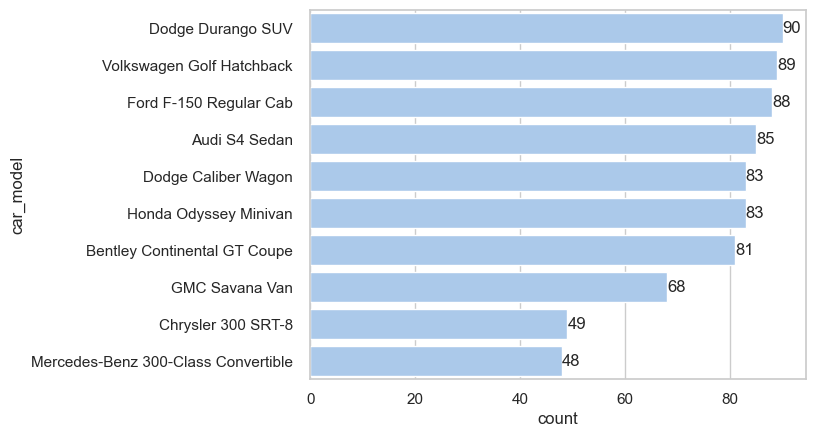

In [328]:
chart=sns.barplot(car_info[:10],orient='h')
chart.bar_label(chart.containers[0])

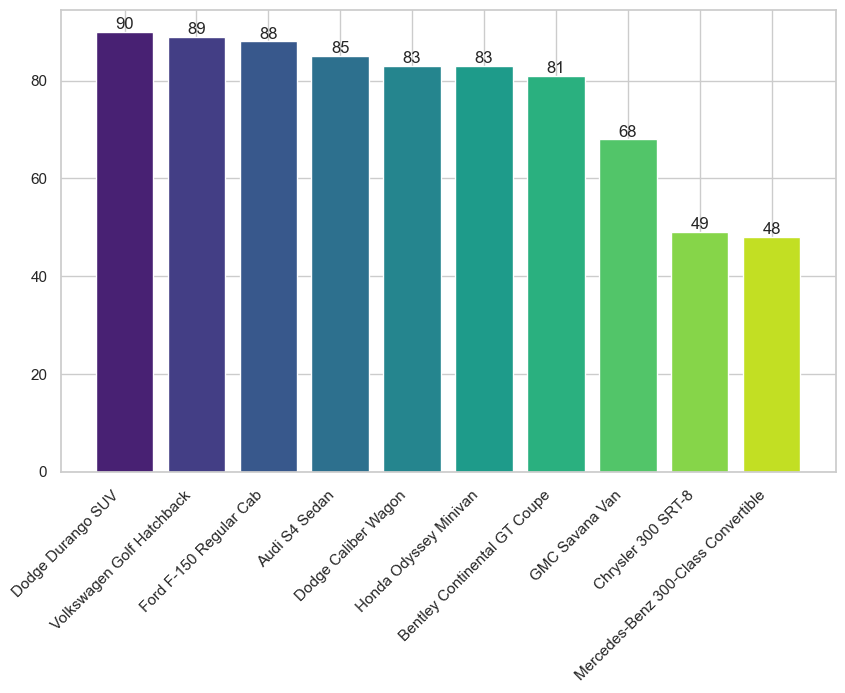

In [329]:
import matplotlib.pyplot as plt
import textwrap
import seaborn as sns

# Generate a color palette using Seaborn
palette = sns.color_palette('viridis', 10)

# Create a bar plot with Matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(car_info.index[:10], car_info.values[:10], color=palette)
plt.xticks(car_info.index[:10], rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom')

### Dodge Durango SUV seems to be the most occuring car model in the dataset followed by Volkswagen Golf with a very minor difference

looking for the least 20 occuring cars to balance out the dataset before training

In [330]:
car_info[129:]

car_model
Ram C-V Cargo Van Minivan                             41
Ferrari 458 Italia Convertible                        40
Chevrolet TrailBlazer SS                              40
Dodge Magnum Wagon                                    40
Hyundai Sonata Sedan                                  40
Dodge Sprinter Cargo Van                              40
Audi TT RS Coupe                                      40
Chevrolet Silverado 1500 Hybrid Crew Cab              40
smart fortwo Convertible                              40
GMC Canyon Extended Cab                               40
Chevrolet Corvette Convertible                        40
Isuzu Ascender SUV                                    40
Dodge Challenger SRT8                                 39
Toyota Sequoia SUV                                    39
Dodge Dakota Club Cab                                 39
Acura ZDX Hatchback                                   39
Lincoln Town Car Sedan                                39
HUMMER H3T Crew Cab  

In [331]:
car_info[159:]

car_model
Aston Martin Virage Coupe                             38
Chevrolet Corvette Ron Fellows Edition Z06            38
Buick Verano Sedan                                    38
Chrysler Town and Country Minivan                     38
Audi RS 4 Convertible                                 37
Chevrolet Tahoe Hybrid SUV                            37
Bentley Continental Supersports Conv. Convertible     37
Mercedes-Benz SL-Class Coupe                          37
MINI Cooper Roadster Convertible                      37
Chevrolet HHR SS                                      37
Bentley Mulsanne Sedan                                36
Lamborghini Gallardo LP 570-4 Superleggera            36
Mazda Tribute SUV                                     36
BMW 1 Series Convertible                              36
Lamborghini Reventon Coupe                            36
Buick Regal GS                                        35
Chevrolet Express Van                                 35
BMW ActiveHybrid 5 Se

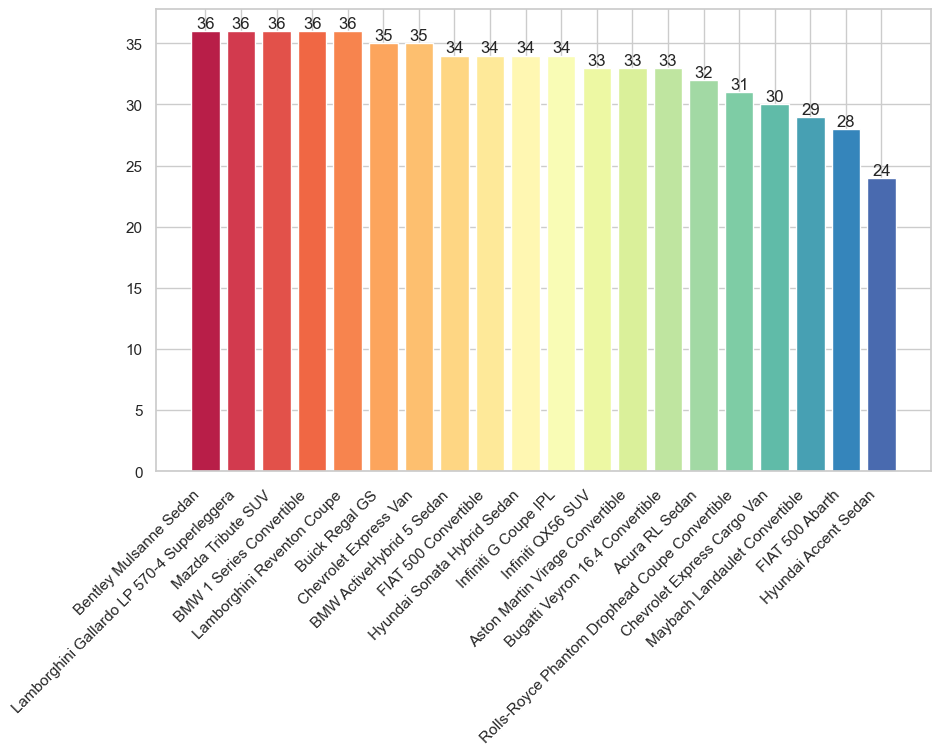

In [332]:
palette = sns.color_palette("Spectral", 20)

plt.figure(figsize=(10, 6))
bars = plt.bar(car_info.index[169:], car_info.values[169:], color=palette)
plt.xticks(car_info.index[169:], rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom')

### Final conclusions 

In total there are 8143 rows in our dataset, each containing a type of car model , total unique car models in our dataset are approx 189 , so the average number of images for the data comes to be approx 44, so we will try to augment data of car models which are below this range to even out the distribution of data 

The car with the lowest frequency is hyundai accent sedan and the car with the highest is Dodge Durango SUV

# 2.Below we will Try to find out the distribution of image sizes

In [333]:
train_dataset_with_full_info

,Unnamed: 0,car_details,image_name,car_year,car_model,Image Name,Image class,x_min,y_min,x_max,y_max,car_details_en,file_path,Height,Width
0,0,Volvo C30 Hatchback 2012,05890.jpg,2012,Volvo C30 Hatchback,05890.jpg,193,140,55,572,300,193,//content/drive/MyDrive/CV_car_detection/Car I...,300,650
1,1,Volvo C30 Hatchback 2012,07454.jpg,2012,Volvo C30 Hatchback,07454.jpg,193,22,52,451,235,193,//content/drive/MyDrive/CV_car_detection/Car I...,265,470
2,2,Volvo C30 Hatchback 2012,02262.jpg,2012,Volvo C30 Hatchback,02262.jpg,193,57,112,543,316,193,//content/drive/MyDrive/CV_car_detection/Car I...,366,600
3,3,Volvo C30 Hatchback 2012,02989.jpg,2012,Volvo C30 Hatchback,02989.jpg,193,585,349,1517,1137,193,//content/drive/MyDrive/CV_car_detection/Car I...,1386,2100
4,4,Volvo C30 Hatchback 2012,06935.jpg,2012,Volvo C30 Hatchback,06935.jpg,193,21,107,484,273,193,//content/drive/MyDrive/CV_car_detection/Car I...,361,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8139,8139,Aston Martin V8 Vantage Coupe 2012,02378.jpg,2012,Aston Martin V8 Vantage Coupe,02378.jpg,9,105,88,252,156,8,//content/drive/MyDrive/CV_car_detection/Car I...,225,300
8140,8140,Aston Martin V8 Vantage Coupe 2012,04724.jpg,2012,Aston Martin V8 Vantage Coupe,04724.jpg,9,27,65,567,361,8,//content/drive/MyDrive/CV_car_detection/Car I...,401,600
8141,8141,Aston Martin V8 Vantage Coupe 2012,06896.jpg,2012,Aston Martin V8 Vantage Coupe,06896.jpg,9,4,61,423,276,8,//content/drive/MyDrive/CV_car_detection/Car I...,360,424
8142,8142,Aston Martin V8 Vantage Coupe 2012,03662.jpg,2012,Aston Martin V8 Vantage Coupe,03662.jpg,9,224,89,1114,688,8,//content/drive/MyDrive/CV_car_detection/Car I...,782,1280


In [334]:
train_dataset_with_full_info['height_width'] = train_dataset_with_full_info['Height'].astype(str) + '_' + train_dataset_with_full_info['Width'].astype(str)

In [335]:
height_width_series=train_dataset_with_full_info['height_width'].value_counts()

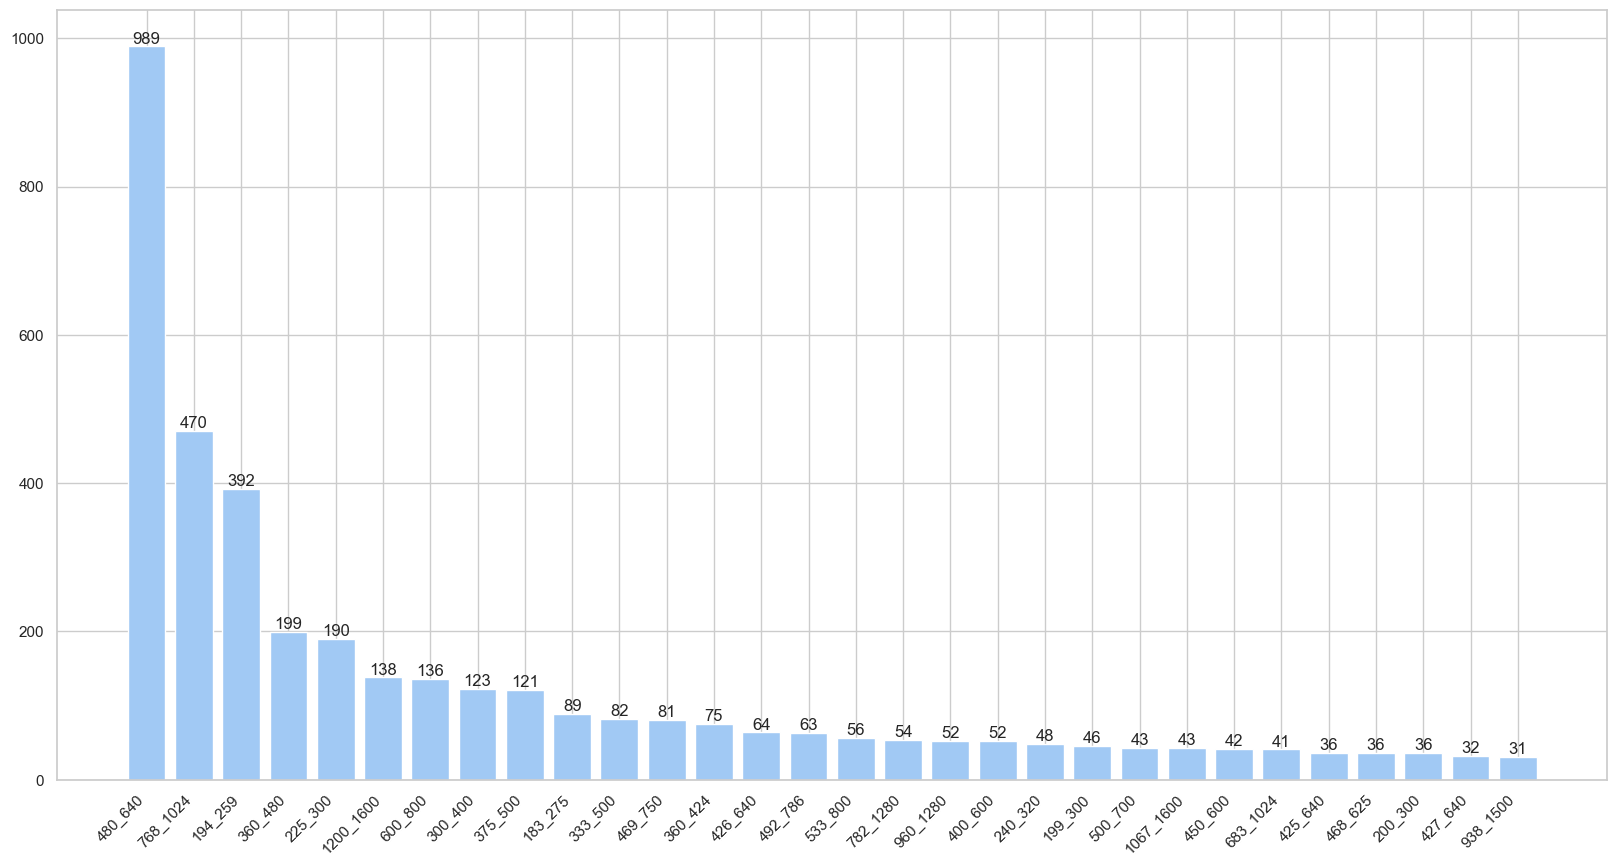

In [336]:
plt.figure(figsize=(20, 10))

bars=plt.bar(height_width_series.index[:30],height_width_series.values[:30])

plt.xticks(height_width_series.index[:30], rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom')

In [337]:
(height_width_series.values==1).sum()

1692

In [338]:
height_width_series

height_width
480_640     989
768_1024    470
194_259     392
360_480     199
225_300     190
           ... 
174_289       1
348_607       1
354_625       1
326_450       1
300_614       1
Name: count, Length: 2267, dtype: int64

In [339]:
2266-1691

575

### Final conclusion

From the above calculations we can see that there is a wide spread of the image sizes with around 1700 height width pair occuring only once , considering this we need to resize these images into values which will help us maintain the correct aspect ratio  and not maximize the computational resources required


# 3.Below we will try to find out the make years of the cars

In [340]:
train_dataset_with_full_info

,Unnamed: 0,car_details,image_name,car_year,car_model,Image Name,Image class,x_min,y_min,x_max,y_max,car_details_en,file_path,Height,Width,height_width
0,0,Volvo C30 Hatchback 2012,05890.jpg,2012,Volvo C30 Hatchback,05890.jpg,193,140,55,572,300,193,//content/drive/MyDrive/CV_car_detection/Car I...,300,650,300_650
1,1,Volvo C30 Hatchback 2012,07454.jpg,2012,Volvo C30 Hatchback,07454.jpg,193,22,52,451,235,193,//content/drive/MyDrive/CV_car_detection/Car I...,265,470,265_470
2,2,Volvo C30 Hatchback 2012,02262.jpg,2012,Volvo C30 Hatchback,02262.jpg,193,57,112,543,316,193,//content/drive/MyDrive/CV_car_detection/Car I...,366,600,366_600
3,3,Volvo C30 Hatchback 2012,02989.jpg,2012,Volvo C30 Hatchback,02989.jpg,193,585,349,1517,1137,193,//content/drive/MyDrive/CV_car_detection/Car I...,1386,2100,1386_2100
4,4,Volvo C30 Hatchback 2012,06935.jpg,2012,Volvo C30 Hatchback,06935.jpg,193,21,107,484,273,193,//content/drive/MyDrive/CV_car_detection/Car I...,361,500,361_500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8139,8139,Aston Martin V8 Vantage Coupe 2012,02378.jpg,2012,Aston Martin V8 Vantage Coupe,02378.jpg,9,105,88,252,156,8,//content/drive/MyDrive/CV_car_detection/Car I...,225,300,225_300
8140,8140,Aston Martin V8 Vantage Coupe 2012,04724.jpg,2012,Aston Martin V8 Vantage Coupe,04724.jpg,9,27,65,567,361,8,//content/drive/MyDrive/CV_car_detection/Car I...,401,600,401_600
8141,8141,Aston Martin V8 Vantage Coupe 2012,06896.jpg,2012,Aston Martin V8 Vantage Coupe,06896.jpg,9,4,61,423,276,8,//content/drive/MyDrive/CV_car_detection/Car I...,360,424,360_424
8142,8142,Aston Martin V8 Vantage Coupe 2012,03662.jpg,2012,Aston Martin V8 Vantage Coupe,03662.jpg,9,224,89,1114,688,8,//content/drive/MyDrive/CV_car_detection/Car I...,782,1280,782_1280


In [341]:
train_dataset_with_full_info['make_year']=train_dataset_with_full_info['car_details'].str[-4:].astype(int)

In [342]:
make_year_series=train_dataset_with_full_info['make_year'].value_counts().sort_index()
make_year_series

make_year
1991      46
1993     139
1994     128
1997      44
1998      92
1999      44
2000      45
2001      90
2002      45
2006      46
2007    1059
2008     283
2009     540
2010     413
2011     312
2012    4818
Name: count, dtype: int64

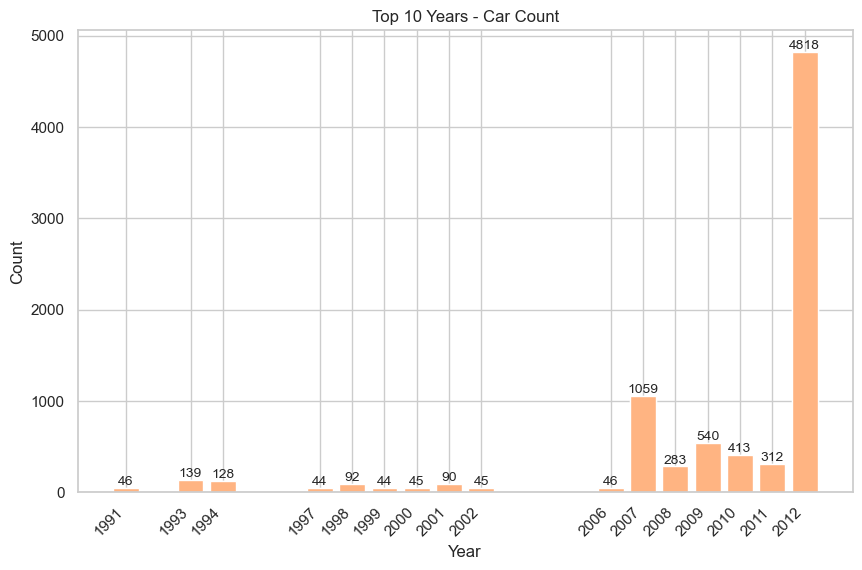

In [343]:
import matplotlib.pyplot as plt

make_year = train_dataset_with_full_info['make_year']

# Get the top 10 year values and their corresponding counts
x=make_year_series.index
y=make_year_series.values

plt.figure(figsize=(10, 6))
plt.bar(x,y)  # Use year values for x-axis

for bar, count in zip(plt.bar(x, y),y):
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, str(count), 
             ha='center', va='bottom', fontsize=10)  # Adjust offset and fontsize
    
plt.xticks(ticks=x,rotation=45, ha='right')  # Rotate x-axis labels
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top 10 Years - Car Count')

plt.show()




### Final Conclusions

Most of the car images  given to us in the training data belong to 2012 year and the time spanning from 2007-2012

# 4. Trying to find out the distribution of different body types 

In [344]:
train_dataset_with_full_info

,Unnamed: 0,car_details,image_name,car_year,car_model,Image Name,Image class,x_min,y_min,x_max,y_max,car_details_en,file_path,Height,Width,height_width,make_year
0,0,Volvo C30 Hatchback 2012,05890.jpg,2012,Volvo C30 Hatchback,05890.jpg,193,140,55,572,300,193,//content/drive/MyDrive/CV_car_detection/Car I...,300,650,300_650,2012
1,1,Volvo C30 Hatchback 2012,07454.jpg,2012,Volvo C30 Hatchback,07454.jpg,193,22,52,451,235,193,//content/drive/MyDrive/CV_car_detection/Car I...,265,470,265_470,2012
2,2,Volvo C30 Hatchback 2012,02262.jpg,2012,Volvo C30 Hatchback,02262.jpg,193,57,112,543,316,193,//content/drive/MyDrive/CV_car_detection/Car I...,366,600,366_600,2012
3,3,Volvo C30 Hatchback 2012,02989.jpg,2012,Volvo C30 Hatchback,02989.jpg,193,585,349,1517,1137,193,//content/drive/MyDrive/CV_car_detection/Car I...,1386,2100,1386_2100,2012
4,4,Volvo C30 Hatchback 2012,06935.jpg,2012,Volvo C30 Hatchback,06935.jpg,193,21,107,484,273,193,//content/drive/MyDrive/CV_car_detection/Car I...,361,500,361_500,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8139,8139,Aston Martin V8 Vantage Coupe 2012,02378.jpg,2012,Aston Martin V8 Vantage Coupe,02378.jpg,9,105,88,252,156,8,//content/drive/MyDrive/CV_car_detection/Car I...,225,300,225_300,2012
8140,8140,Aston Martin V8 Vantage Coupe 2012,04724.jpg,2012,Aston Martin V8 Vantage Coupe,04724.jpg,9,27,65,567,361,8,//content/drive/MyDrive/CV_car_detection/Car I...,401,600,401_600,2012
8141,8141,Aston Martin V8 Vantage Coupe 2012,06896.jpg,2012,Aston Martin V8 Vantage Coupe,06896.jpg,9,4,61,423,276,8,//content/drive/MyDrive/CV_car_detection/Car I...,360,424,360_424,2012
8142,8142,Aston Martin V8 Vantage Coupe 2012,03662.jpg,2012,Aston Martin V8 Vantage Coupe,03662.jpg,9,224,89,1114,688,8,//content/drive/MyDrive/CV_car_detection/Car I...,782,1280,782_1280,2012


In [345]:
train_dataset_with_full_info['car_model']

0                 Volvo C30 Hatchback 
1                 Volvo C30 Hatchback 
2                 Volvo C30 Hatchback 
3                 Volvo C30 Hatchback 
4                 Volvo C30 Hatchback 
                     ...              
8139    Aston Martin V8 Vantage Coupe 
8140    Aston Martin V8 Vantage Coupe 
8141    Aston Martin V8 Vantage Coupe 
8142    Aston Martin V8 Vantage Coupe 
8143    Aston Martin V8 Vantage Coupe 
Name: car_model, Length: 8144, dtype: object

In [346]:
car_types = {
    'SUV': ['SUV', 'Sport Utility Vehicle'],
    'Sedan': ['Sedan'],
    'Coupe': ['Coupe'],
    'Convertible': ['Convertible', 'Conv.'],
    'Hatchback': ['Hatchback'],
    'Minivan': ['Minivan'],
    'Van': ['Van', 'Cargo Van'],
    'Pickup Truck': ['Pickup', 'Crew Cab', 'Extended Cab', 'Regular Cab', 'SuperCab', 'Quad Cab']
}

In [347]:
def func(names):
    for body,synonyms in car_types.items():
        if any (synonym in names for synonym in synonyms):
            return body
            

In [348]:
train_dataset_with_full_info['car_body']=train_dataset_with_full_info['car_model'].apply(func)

In [349]:
car_body=train_dataset_with_full_info['car_body'].value_counts()

In [350]:
car_body

car_body
Sedan           1907
SUV             1437
Coupe           1119
Convertible     1005
Pickup Truck     722
Hatchback        554
Van              291
Minivan          250
Name: count, dtype: int64

Text(0.5, 1.0, 'Train dataset - Count by Car Body Type')

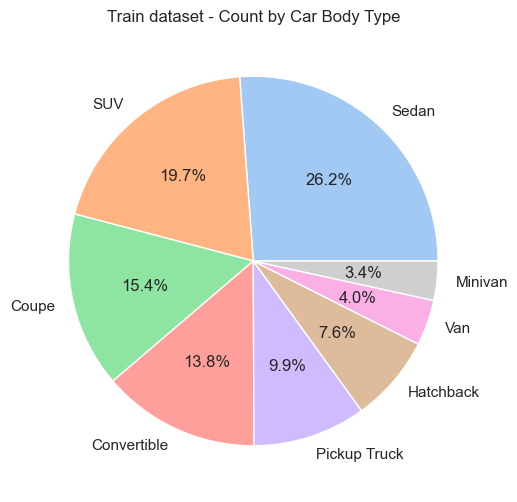

In [351]:
plt.figure(figsize=(10, 6))
plt.pie(car_body,labels=car_body.index,autopct='%1.1f%%')
plt.title('Train dataset - Count by Car Body Type')

### Final conclusions

The above figure shows that approx70-75% of the entire cars can mainly categorized into 3 categories , coupe suv sedan , with Sedan having the highest percentage in body type

# 5.Trying to Find the highest occuring car brands

In [352]:
train_dataset_with_full_info

,Unnamed: 0,car_details,image_name,car_year,car_model,Image Name,Image class,x_min,y_min,x_max,y_max,car_details_en,file_path,Height,Width,height_width,make_year,car_body
0,0,Volvo C30 Hatchback 2012,05890.jpg,2012,Volvo C30 Hatchback,05890.jpg,193,140,55,572,300,193,//content/drive/MyDrive/CV_car_detection/Car I...,300,650,300_650,2012,Hatchback
1,1,Volvo C30 Hatchback 2012,07454.jpg,2012,Volvo C30 Hatchback,07454.jpg,193,22,52,451,235,193,//content/drive/MyDrive/CV_car_detection/Car I...,265,470,265_470,2012,Hatchback
2,2,Volvo C30 Hatchback 2012,02262.jpg,2012,Volvo C30 Hatchback,02262.jpg,193,57,112,543,316,193,//content/drive/MyDrive/CV_car_detection/Car I...,366,600,366_600,2012,Hatchback
3,3,Volvo C30 Hatchback 2012,02989.jpg,2012,Volvo C30 Hatchback,02989.jpg,193,585,349,1517,1137,193,//content/drive/MyDrive/CV_car_detection/Car I...,1386,2100,1386_2100,2012,Hatchback
4,4,Volvo C30 Hatchback 2012,06935.jpg,2012,Volvo C30 Hatchback,06935.jpg,193,21,107,484,273,193,//content/drive/MyDrive/CV_car_detection/Car I...,361,500,361_500,2012,Hatchback
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8139,8139,Aston Martin V8 Vantage Coupe 2012,02378.jpg,2012,Aston Martin V8 Vantage Coupe,02378.jpg,9,105,88,252,156,8,//content/drive/MyDrive/CV_car_detection/Car I...,225,300,225_300,2012,Coupe
8140,8140,Aston Martin V8 Vantage Coupe 2012,04724.jpg,2012,Aston Martin V8 Vantage Coupe,04724.jpg,9,27,65,567,361,8,//content/drive/MyDrive/CV_car_detection/Car I...,401,600,401_600,2012,Coupe
8141,8141,Aston Martin V8 Vantage Coupe 2012,06896.jpg,2012,Aston Martin V8 Vantage Coupe,06896.jpg,9,4,61,423,276,8,//content/drive/MyDrive/CV_car_detection/Car I...,360,424,360_424,2012,Coupe
8142,8142,Aston Martin V8 Vantage Coupe 2012,03662.jpg,2012,Aston Martin V8 Vantage Coupe,03662.jpg,9,224,89,1114,688,8,//content/drive/MyDrive/CV_car_detection/Car I...,782,1280,782_1280,2012,Coupe


In [353]:
car_brands={
    'AM General': ['AM General'],
    'Acura': ['Acura'],
    'Aston Martin': ['Aston Martin'],
    'Audi': ['Audi'],
    'BMW': ['BMW'],
    'Bentley': ['Bentley'],
    'Bugatti': ['Bugatti'],
    'Buick': ['Buick'],
    'Cadillac': ['Cadillac'],
    'Chevrolet': ['Chevrolet'],
    'Chrysler': ['Chrysler'],
    'Daewoo': ['Daewoo'],
    'Dodge': ['Dodge'],
    'Eagle': ['Eagle'],
    'FIAT': ['FIAT'],
    'Ferrari': ['Ferrari'],
    'Fisker': ['Fisker'],
    'Ford': ['Ford'],
    'GMC': ['GMC'],
    'Geo': ['Geo'],
    'HUMMER': ['HUMMER'],
    'Honda': ['Honda'],
    'Hyundai': ['Hyundai'],
    'Infiniti': ['Infiniti'],
    'Isuzu': ['Isuzu'],
    'Jaguar': ['Jaguar'],
    'Jeep': ['Jeep'],
    'Lamborghini': ['Lamborghini'],
    'Land Rover': ['Land Rover'],
    'Lincoln': ['Lincoln'],
    'MINI': ['MINI'],
    'Maybach': ['Maybach'],
    'Mazda': ['Mazda'],
    'McLaren': ['McLaren'],
    'Mercedes-Benz': ['Mercedes-Benz'],
    'Mitsubishi': ['Mitsubishi'],
    'Nissan': ['Nissan'],
    'Plymouth': ['Plymouth'],
    'Porsche': ['Porsche'],
    'Ram': ['Ram'],
    'Rolls-Royce': ['Rolls-Royce'],
    'Scion': ['Scion'],
    'Spyker': ['Spyker'],
    'Suzuki': ['Suzuki'],
    'Tesla': ['Tesla'],
    'Toyota': ['Toyota'],
    'Volkswagen': ['Volkswagen'],
    'Volvo': ['Volvo'],
    'smart': ['smart']
}

def car_brand(name):
    for brand, keywords in car_brands.items():
        for keyword in keywords:
            if keyword in name:
                return brand

In [354]:
train_dataset_with_full_info['car_brand']=train_dataset_with_full_info['car_model'].apply(car_brand)

In [355]:
train_dataset_with_full_info['car_brand']

0              Volvo
1              Volvo
2              Volvo
3              Volvo
4              Volvo
            ...     
8139    Aston Martin
8140    Aston Martin
8141    Aston Martin
8142    Aston Martin
8143    Aston Martin
Name: car_brand, Length: 8144, dtype: object

In [356]:
car_brand_series=train_dataset_with_full_info['car_brand'].value_counts()

In [357]:
car_brand_series

car_brand
Chevrolet        905
Dodge            630
Audi             589
BMW              531
Ford             521
Hyundai          438
Mercedes-Benz    261
Chrysler         260
Acura            242
GMC              238
Bentley          238
Jeep             220
Nissan           171
Toyota           168
Suzuki           167
Ferrari          164
Honda            161
Lamborghini      161
Buick            158
Aston Martin     157
Volkswagen       132
Volvo            131
Cadillac         129
Rolls-Royce      114
Spyker            88
Land Rover        86
HUMMER            83
Bugatti           77
Infiniti          67
FIAT              62
Mitsubishi        48
Jaguar            47
Eagle             46
Daewoo            45
Geo               45
AM General        45
Fisker            44
McLaren           44
Porsche           44
Plymouth          44
Scion             42
Ram               41
Isuzu             40
smart             40
Lincoln           39
Tesla             39
MINI              37
Maz

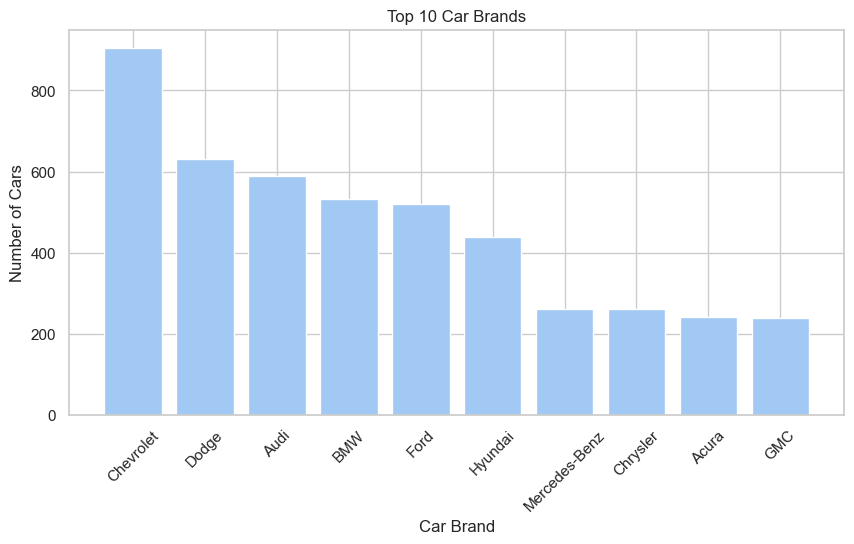

In [358]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x=car_brand_series.index[:10]
y=car_brand_series.values[:10]

plt.figure(figsize=(10,5))
plt.bar(x, y)   
plt.xlabel('Car Brand')
plt.ylabel('Number of Cars')
plt.title('Top 10 Car Brands')
plt.xticks(rotation=45)
plt.show()



### Final conclusion 

The highest occuring car brand in our dataset seems to be Chevrolet followed by Dodge and Audi 

# 6.Trying to find out the distribution of different body types across top brands

In [359]:
train_dataset_with_full_info

,Unnamed: 0,car_details,image_name,car_year,car_model,Image Name,Image class,x_min,y_min,x_max,y_max,car_details_en,file_path,Height,Width,height_width,make_year,car_body,car_brand
0,0,Volvo C30 Hatchback 2012,05890.jpg,2012,Volvo C30 Hatchback,05890.jpg,193,140,55,572,300,193,//content/drive/MyDrive/CV_car_detection/Car I...,300,650,300_650,2012,Hatchback,Volvo
1,1,Volvo C30 Hatchback 2012,07454.jpg,2012,Volvo C30 Hatchback,07454.jpg,193,22,52,451,235,193,//content/drive/MyDrive/CV_car_detection/Car I...,265,470,265_470,2012,Hatchback,Volvo
2,2,Volvo C30 Hatchback 2012,02262.jpg,2012,Volvo C30 Hatchback,02262.jpg,193,57,112,543,316,193,//content/drive/MyDrive/CV_car_detection/Car I...,366,600,366_600,2012,Hatchback,Volvo
3,3,Volvo C30 Hatchback 2012,02989.jpg,2012,Volvo C30 Hatchback,02989.jpg,193,585,349,1517,1137,193,//content/drive/MyDrive/CV_car_detection/Car I...,1386,2100,1386_2100,2012,Hatchback,Volvo
4,4,Volvo C30 Hatchback 2012,06935.jpg,2012,Volvo C30 Hatchback,06935.jpg,193,21,107,484,273,193,//content/drive/MyDrive/CV_car_detection/Car I...,361,500,361_500,2012,Hatchback,Volvo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8139,8139,Aston Martin V8 Vantage Coupe 2012,02378.jpg,2012,Aston Martin V8 Vantage Coupe,02378.jpg,9,105,88,252,156,8,//content/drive/MyDrive/CV_car_detection/Car I...,225,300,225_300,2012,Coupe,Aston Martin
8140,8140,Aston Martin V8 Vantage Coupe 2012,04724.jpg,2012,Aston Martin V8 Vantage Coupe,04724.jpg,9,27,65,567,361,8,//content/drive/MyDrive/CV_car_detection/Car I...,401,600,401_600,2012,Coupe,Aston Martin
8141,8141,Aston Martin V8 Vantage Coupe 2012,06896.jpg,2012,Aston Martin V8 Vantage Coupe,06896.jpg,9,4,61,423,276,8,//content/drive/MyDrive/CV_car_detection/Car I...,360,424,360_424,2012,Coupe,Aston Martin
8142,8142,Aston Martin V8 Vantage Coupe 2012,03662.jpg,2012,Aston Martin V8 Vantage Coupe,03662.jpg,9,224,89,1114,688,8,//content/drive/MyDrive/CV_car_detection/Car I...,782,1280,782_1280,2012,Coupe,Aston Martin


In [360]:
top_brands=train_dataset_with_full_info['car_brand'].value_counts()[:10]

In [361]:
top_brands

car_brand
Chevrolet        905
Dodge            630
Audi             589
BMW              531
Ford             521
Hyundai          438
Mercedes-Benz    261
Chrysler         260
Acura            242
GMC              238
Name: count, dtype: int64

In [362]:
filtered_df=train_dataset_with_full_info[train_dataset_with_full_info['car_brand'].isin(top_brands.index)]

In [363]:
filtered_df

,Unnamed: 0,car_details,image_name,car_year,car_model,Image Name,Image class,x_min,y_min,x_max,y_max,car_details_en,file_path,Height,Width,height_width,make_year,car_body,car_brand
1349,1349,Mercedes-Benz 300-Class Convertible 1993,06364.jpg,1993,Mercedes-Benz 300-Class Convertible,06364.jpg,161,31,63,192,136,160,//content/drive/MyDrive/CV_car_detection/Car I...,180,240,180_240,1993,Convertible,Mercedes-Benz
1350,1350,Mercedes-Benz 300-Class Convertible 1993,05807.jpg,1993,Mercedes-Benz 300-Class Convertible,05807.jpg,161,63,163,558,367,160,//content/drive/MyDrive/CV_car_detection/Car I...,480,640,480_640,1993,Convertible,Mercedes-Benz
1351,1351,Mercedes-Benz 300-Class Convertible 1993,02076.jpg,1993,Mercedes-Benz 300-Class Convertible,02076.jpg,161,17,69,247,157,160,//content/drive/MyDrive/CV_car_detection/Car I...,194,259,194_259,1993,Convertible,Mercedes-Benz
1352,1352,Mercedes-Benz 300-Class Convertible 1993,05995.jpg,1993,Mercedes-Benz 300-Class Convertible,05995.jpg,161,19,82,618,393,160,//content/drive/MyDrive/CV_car_detection/Car I...,478,640,478_640,1993,Convertible,Mercedes-Benz
1353,1353,Mercedes-Benz 300-Class Convertible 1993,01218.jpg,1993,Mercedes-Benz 300-Class Convertible,01218.jpg,161,51,256,1007,585,160,//content/drive/MyDrive/CV_car_detection/Car I...,768,1024,768_1024,1993,Convertible,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8053,8053,Acura TL Type-S 2008,03102.jpg,2008,Acura TL Type-S,03102.jpg,4,14,135,605,445,4,//content/drive/MyDrive/CV_car_detection/Car I...,480,640,480_640,2008,None,Acura
8054,8054,Acura TL Type-S 2008,07050.jpg,2008,Acura TL Type-S,07050.jpg,4,29,444,1253,928,4,//content/drive/MyDrive/CV_car_detection/Car I...,1024,1280,1024_1280,2008,None,Acura
8055,8055,Acura TL Type-S 2008,06099.jpg,2008,Acura TL Type-S,06099.jpg,4,69,83,544,372,4,//content/drive/MyDrive/CV_car_detection/Car I...,469,625,469_625,2008,None,Acura
8056,8056,Acura TL Type-S 2008,00920.jpg,2008,Acura TL Type-S,00920.jpg,4,56,23,776,372,4,//content/drive/MyDrive/CV_car_detection/Car I...,390,800,390_800,2008,None,Acura


In [364]:
train_dataset_with_full_info['car_body'].value_counts()

car_body
Sedan           1907
SUV             1437
Coupe           1119
Convertible     1005
Pickup Truck     722
Hatchback        554
Van              291
Minivan          250
Name: count, dtype: int64

In [365]:
sub_dataset=filtered_df.groupby('car_brand')['car_body']

In [366]:
grouped_data=sub_dataset.value_counts().unstack()

In [367]:
grouped_data

car_body,Convertible,Coupe,Hatchback,Minivan,Pickup Truck,SUV,Sedan,Van
car_brand,,,,,,,,
Acura,NaN,NaN,39.0,NaN,NaN,NaN,116.0,NaN
Audi,79.0,210.0,41.0,NaN,NaN,NaN,216.0,NaN
BMW,162.0,86.0,NaN,NaN,NaN,123.0,118.0,NaN
Chevrolet,85.0,45.0,NaN,NaN,254.0,81.0,171.0,65.0
Chrysler,129.0,NaN,NaN,38.0,NaN,44.0,NaN,NaN
Dodge,NaN,NaN,NaN,44.0,128.0,134.0,41.0,40.0
Ford,45.0,46.0,NaN,44.0,172.0,88.0,88.0,38.0
GMC,NaN,NaN,NaN,NaN,40.0,130.0,NaN,68.0
Hyundai,NaN,NaN,84.0,NaN,NaN,128.0,226.0,NaN


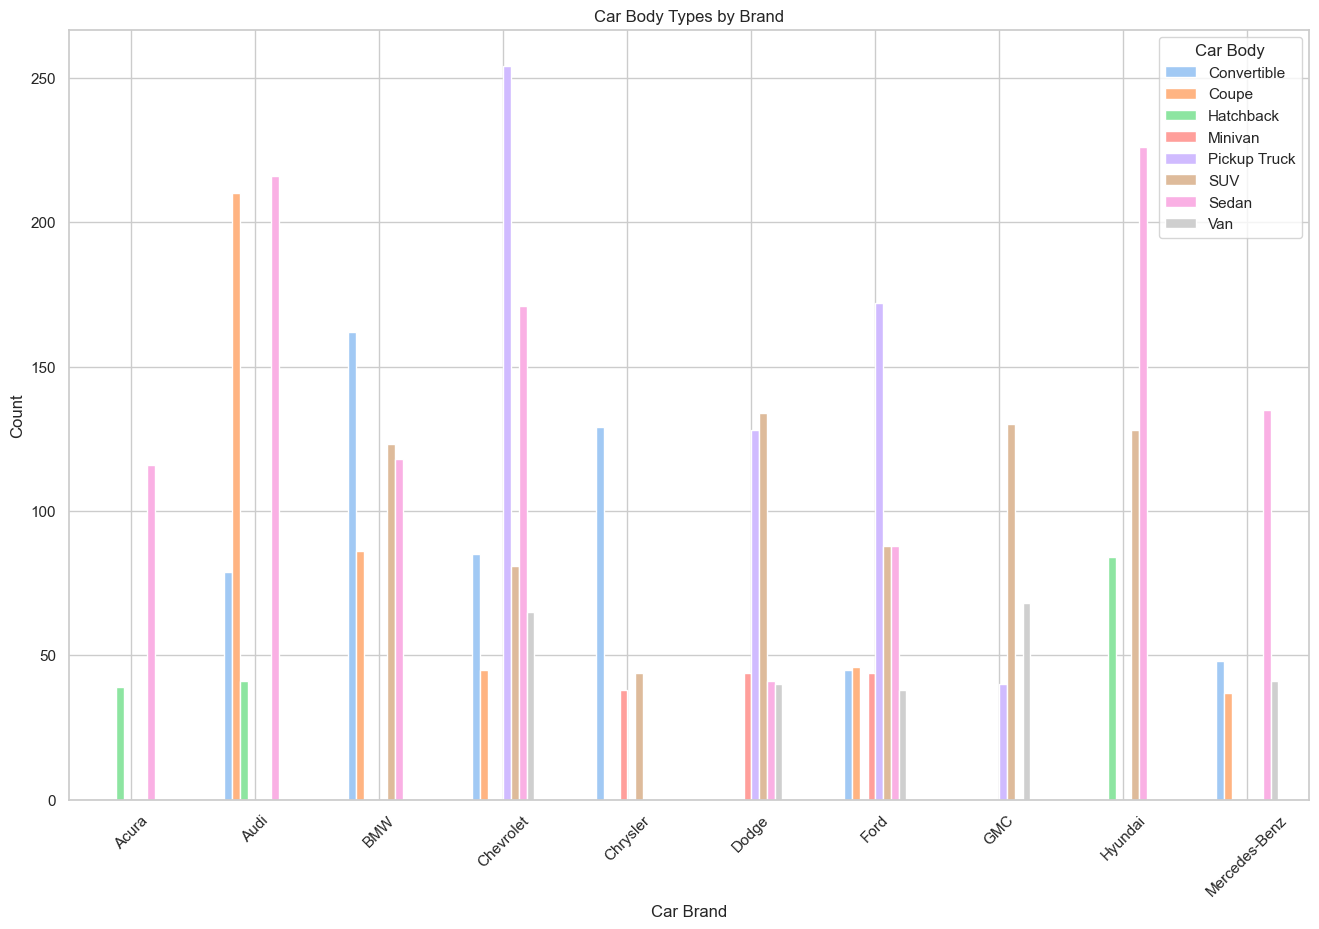

In [368]:
sns.set_theme(style="whitegrid")
sns.set_palette('pastel') 
ax = grouped_data.plot(kind='bar',figsize=(16, 10))
ax.set_title('Car Body Types by Brand')
ax.set_xlabel('Car Brand')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Car Body')
plt.show()

By the above we can see that chevorlet pickup truck body style has the maximum count followed by audi and hyundai in sedan type

among the top 10 highest count of brands , hatchback is only being manufactured by acura audi and hyundai and minivan by chrysler ,dodge and ford

# Final conclusion of EDA

1. Dodge Durango SUV seems to be the highest occuring car in the entire dataset with a count of 90.
2. Hyundai accent sedan seems to be the least occuring car in the entire dataset with a count of 24.
3. The highest number of height width pairs is 480_640  with a count of  989. there are approx 1700 images , which are occuring only once, we need 
to get the distribution streamlined , making sure least amount of data is lost and we also preserve aspect ratio of images for optimal training
4. Most of the car images  given to us in the training data belong to 2012 year and the time spanning from 2007-2012.
5. Approx70-75% of the entire cars can mainly categorized into 3 categories , coupe suv sedan , with Sedan having the highest percentage in body type
6. The highest occuring car brand in our dataset seems to be Chevrolet followed by Dodge and Audi 
7. Chevorlet pickup truck body style has the maximum count followed by audi and hyundai in sedan type
8. Among the top 10 highest count of brands , hatchback is only being manufactured by acura audi and hyundai and minivan by chrysler ,dodge and ford
